In [1]:
#Modelo entrenado con fastai, pytorch

In [2]:
import fastai.torch_core
from fastai.imports import *
from fastai.vision import *
from fastai.metrics import error_rate
import torch
fastai.torch_core.defaults.device = 'cpu'

In [5]:
path="INPUT/rps/"

In [6]:
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(),num_workers=4, size=(106, 68),valid_pct = 0.2,bs = 64).normalize(imagenet_stats)
print(data.classes)

['paper', 'rock', 'scissors']


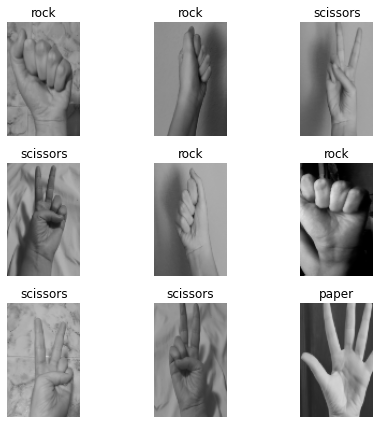

In [7]:
data.show_batch(rows=3, figsize=(7,6))

In [101]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 4.37E-03
Min loss divided by 10: 1.45E-02


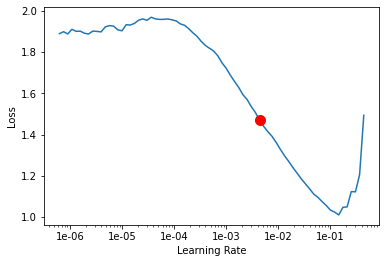

In [102]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [103]:
#lr = 5e-3
min_grad_lr = learn.recorder.min_grad_lr

In [104]:
learn.fit_one_cycle(5, slice(min_grad_lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.337587,0.056431,0.978929,04:54
1,0.116590,0.018998,0.992537,04:53
2,0.060705,0.004833,0.998683,04:53
3,0.022137,0.000529,1.000000,04:52
4,0.025331,0.000289,1.000000,05:09


In [105]:
learn.save('stage-1')

In [106]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (9112 items)
x: ImageList
Image (3, 106, 68),Image (3, 106, 68),Image (3, 106, 68),Image (3, 106, 68),Image (3, 106, 68)
y: CategoryList
scissors,scissors,scissors,scissors,scissors
Path: ../INPUT/rps;

Valid: LabelList (2278 items)
x: ImageList
Image (3, 106, 68),Image (3, 106, 68),Image (3, 106, 68),Image (3, 106, 68),Image (3, 106, 68)
y: CategoryList
rock,paper,rock,rock,rock
Path: ../INPUT/rps;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track

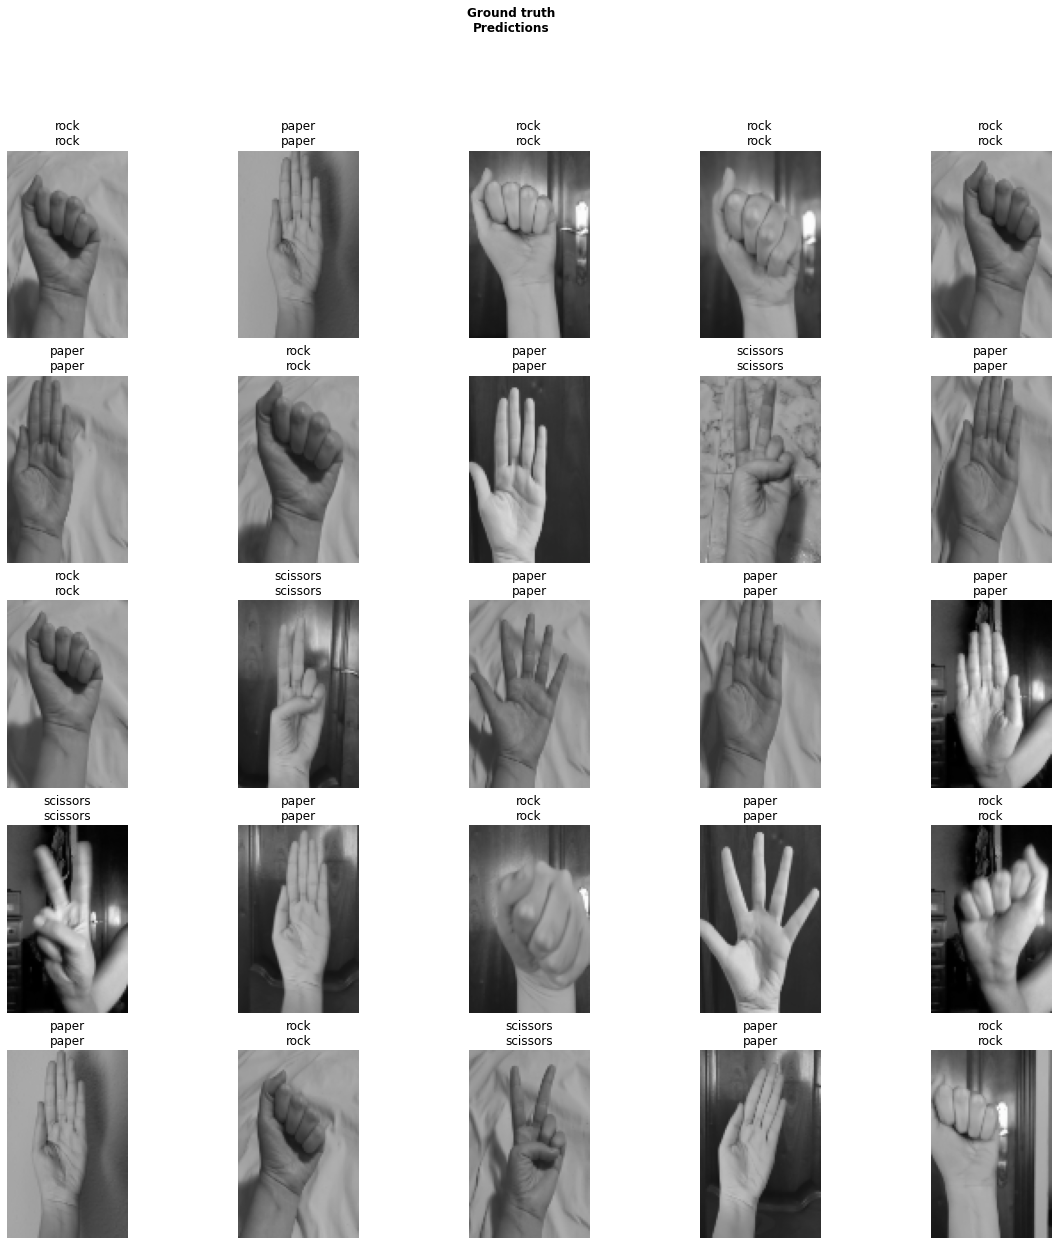

In [107]:
learn.show_results()

In [108]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

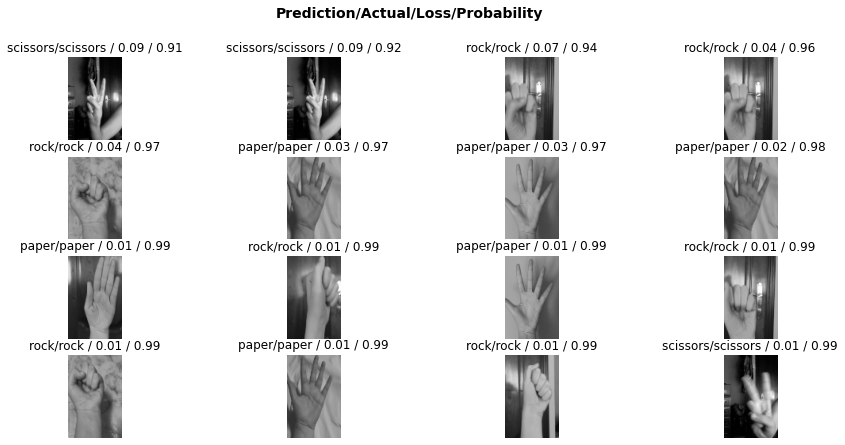

In [109]:
interp.plot_top_losses(16, figsize=(15,7))

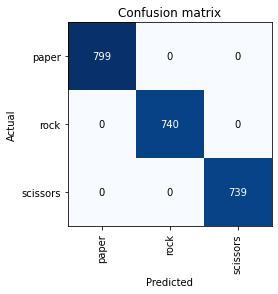

In [110]:
interp.plot_confusion_matrix()


In [111]:
#learn.unfreeze()

In [112]:
#learn.fit_one_cycle(1)


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Failed to compute the gradients, there might not be enough points.


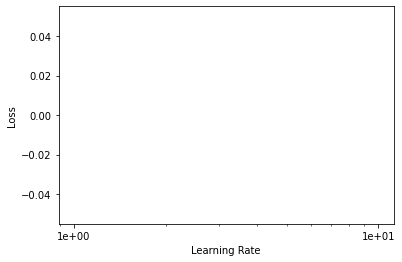

In [113]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [114]:
learn.load('stage-1');

In [115]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-7,4e-5))

epoch,train_loss,valid_loss,accuracy,time
0,0.014244,0.000391,1.000000,09:19
1,0.017008,0.000202,1.000000,09:08


In [116]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

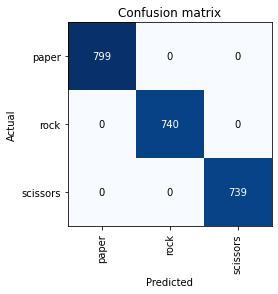

In [117]:
interp.plot_confusion_matrix()

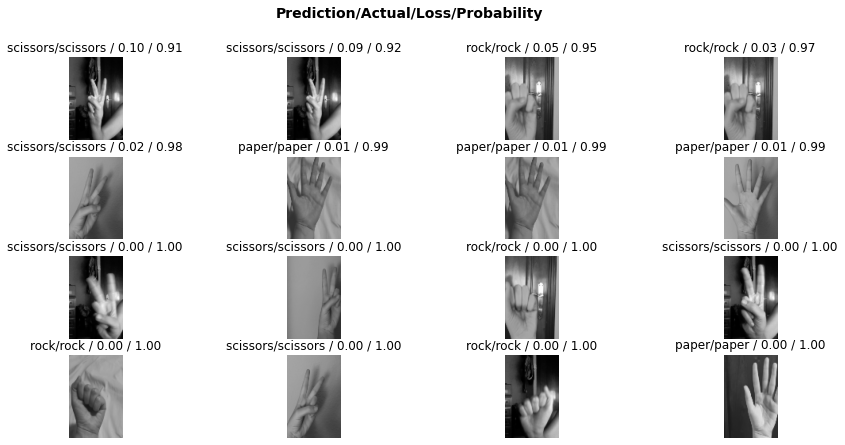

In [118]:
interp.plot_top_losses(16, figsize=(15,7))

In [8]:
learn.export()